# Bilingual Ratio Notebook 
Go to Cell > Run All to run the notebook. 

In [5]:
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/Users/Meg/Downloads/responses.csv")

This gives you a general sense of the language breakdown of the participant.

In [7]:
lToCat = df["Language"].value_counts()
lToCat

Spanish                46
Unsure                 38
Mixed                  36
Categorize language    25
Quechua                17
No speech               9
PID                     3
Name: Language, dtype: int64

## Bilingual Ratio/Variance vs. Entry Number

In [8]:
spanish, quechua, mixed, other = 1, 1, 1, 1
num = 0
entryNums = []
spanishRatios = []
quechuaRatios = []
mixedRatios = []
variances = []
for index, row in df.iterrows(): 
    lang = row['Language']
    if lang == 'Spanish': 
        spanish += 1 
    elif lang == 'Quechua':
        quechua += 1 
    elif lang == 'Mixed': 
        mixed += 1
    else: 
        other += 1
    entryNums.append(num)
    num += 1
    spanishRatios.append(spanish/(quechua + spanish + mixed))
    quechuaRatios.append(quechua/(quechua + spanish + mixed))
    mixedRatios.append(mixed/(quechua + spanish + mixed))
    variances.append(np.var(spanishRatios))

## Bilingual Ratio
This will display the ratio of the spanish compared to the rest of the counts, an error bar is also displayed which shows the variance at each point, which should also decrease.

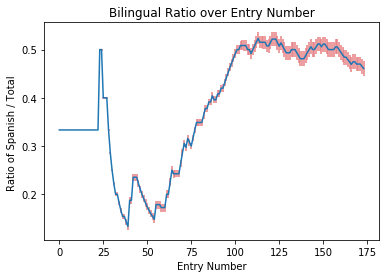

In [9]:
### RATIOS VS ENTRY NUMS
plt.title('Bilingual Ratio over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, spanishRatios)
plt.errorbar(entryNums, spanishRatios, yerr=variances, fmt='none', ecolor='#e67f83');
plt.show()

## Variance
We want variance to get lower over the number of entries, so that the Spanish bilingual ratio stabilizes over time. It is important to watch variance and the graph above, just marking the ratio to find out when there have been enough entries annotated.

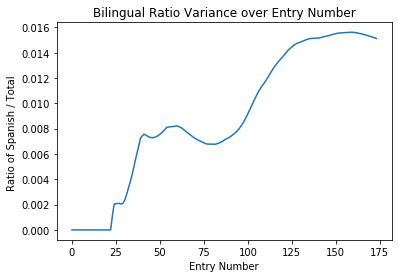

In [10]:
## VARIANCE VS ENTRY NUMS
plt.title('Bilingual Ratio Variance over Entry Number')
plt.ylabel('Ratio of Spanish / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, variances)
plt.show()

## Language Category 
This is the count of category, a bar graph showing how many entries there are of each type. 

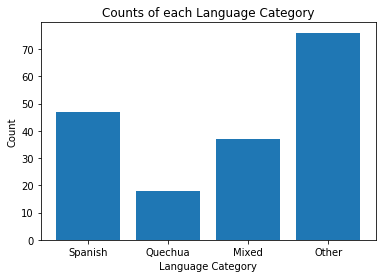

In [11]:
x = np.arange(4)
plt.bar(x, [spanish, quechua, mixed, other])
plt.xticks(x, ('Spanish', 'Quechua', 'Mixed', 'Other'))
plt.title('Counts of each Language Category')
plt.xlabel('Language Category')
plt.ylabel('Count')
plt.show()

## Stackplot of Ratios
This shows what the breakdown over entry number each language has.

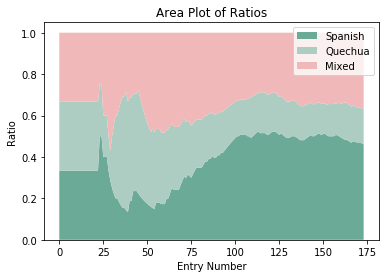

In [12]:
plt.stackplot(entryNums, [spanishRatios, quechuaRatios, mixedRatios], baseline='zero', labels=['Spanish', 'Quechua', 
                            'Mixed'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### 